In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#218 bead spacings alternate between 10 and 15 nm
#217 bead spacings are all 25 nm
#213 bead spacings are all 15 nm
#210 bead spacings alternate between 15 and 25 nm, 1000 snapshots

In [3]:
def vector_magnitude(vector):
    return np.linalg.norm(vector)

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude_product = vector_magnitude(vector1) * vector_magnitude(vector2)
    return dot_product / magnitude_product


In [4]:
def t1function(df, initial_comparison_location):
    correlations_t1 = []
    distance = []
    for i in range(len(df)):
        end_point_1 = df["t1"][initial_comparison_location]
        end_point_2 = df["t1"][i]
        start_point_r1 = np.array([df.iloc[initial_comparison_location, 1], df.iloc[initial_comparison_location, 2], df.iloc[initial_comparison_location, 3]])
        start_point_r2 = np.array([df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3]])
        
        vector1 = end_point_1 - start_point_r1
        vector2 = end_point_2 - start_point_r2
        
        correlation = cosine_similarity(vector1, vector2)
        correlations_t1.append(correlation)
        
        distance.append(abs(initial_comparison_location - i))
    t1_array = [distance, correlations_t1]
    return np.array(t1_array)


In [5]:
def t3function(df, initial_comparison_location):
    correlations_t3 = []
    distance = []
    for i in range(len(df)):
        end_point_1 = np.array([df.iloc[initial_comparison_location, 4], df.iloc[initial_comparison_location, 5], df.iloc[initial_comparison_location, 6]])
        end_point_2 = np.array([df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6]])
        start_point_r1 = np.array([df.iloc[initial_comparison_location, 1], df.iloc[initial_comparison_location, 2], df.iloc[initial_comparison_location, 3]])
        start_point_r2 = np.array([df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3]])
        
        vector1 = end_point_1 - start_point_r1
        vector2 = end_point_2 - start_point_r2
        
        correlation = cosine_similarity(vector1, vector2)
        correlations_t3.append(correlation)
        
        distance.append(abs(initial_comparison_location - i))
    t3_array = [distance, correlation]
    return np.array(t3_array)

In [7]:
simulation_number = 218
t1_final_list = []
correlation = []
distance = []
for snap in range(177,178):
    df = pd.read_csv("/Users/angelikahirsch/Documents/chromo/output" + "/sim_" + str(simulation_number) + "/poly_1-" + str(snap)+ ".csv")
    t1 = []
    for i in range(len(df)):
        t2coordinates = np.array([df.iloc[i, 7], df.iloc[i, 8], df.iloc[i, 9]])
        t3coordinates = np.array([df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6]])
        t1coordinates = np.cross(t2coordinates, t3coordinates)
        t1.append(t1coordinates)
    df["t1"] = t1
    for initial_comparison in range(len(df)):
        t1_final_list.append(t1function(df, initial_comparison))
for i in range(len(t1_final_list)):
    distance = np.concatenate((distance, t1_final_list[i][0]), axis=None)
    correlation = np.concatenate((correlation, t1_final_list[i][1]), axis=None)
    if len(t1_final_list[i][0]) != len(t1_final_list[i][1]):
        print("difference")
        print(snap)
        print(i)
    if len(distance) != len(correlation):
        print("diff")
        print(snap)
        print("i")
    
    



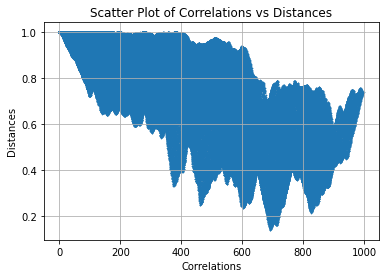

In [8]:
plt.scatter(distance, correlation, marker='.', s=1)  # Adjust marker and size as needed
plt.xlabel('Correlations')
plt.ylabel('Distances')
plt.title('Scatter Plot of Correlations vs Distances')
plt.grid(True)
plt.show()

In [9]:
print(distance[:20])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


In [206]:
for i in range(len(t1_final_list)):
    if len(t1_final_list[i][0]) != len(t1_final_list[i][1]):
        print("difference")
        print(i)
print("no differnece")

no differnece


In [10]:
analysis_df = pd.DataFrame({'Distances': correlation, 'Correlation': distance})

In [11]:
selected_rows = analysis_df[analysis_df['Distances'] == 997]
print(len(selected_rows))
print(selected_rows)

0
Empty DataFrame
Columns: [Distances, Correlation]
Index: []


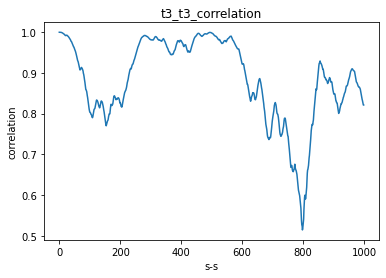

In [19]:
plt.plot(t3function(df))

# Add labels and title
plt.xlabel("s-s")
plt.ylabel('correlation')
plt.title('t3_t3_correlation')

# Display the plot
plt.show()

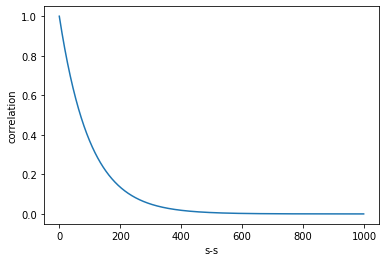

In [20]:
# What the t1 and t3 correlations should theoretically look like
lt = 100
lp = 100
x = df. iloc[:,0]
y = []
for i in range(len(x)):
    new_y = -1 * (x[i]/lt)
    new_y = np.exp(new_y)
    y.append(new_y)
    
plt.plot(y)
plt.xlabel("s-s")
plt.ylabel('correlation')

# Display the plot
plt.show()
            